In [9]:
# Convert Date column to datetime format for easier manipulation
yahoo_data['Date'] = pd.to_datetime(yahoo_data['Date'])

# Separate the Date column
date_column = yahoo_data['Date']

# Keep the rest of the dataset for feature engineering
features = yahoo_data.drop(columns=['Date'])

In [11]:
#checking for outliers in our dataset using the z score, then removing the rows with the outliers
from scipy.stats import zscore

# Using Z-score for outlier detection
from scipy.stats import zscore

z_scores = features.apply(zscore)
outliers = (z_scores.abs() > 3).any(axis=1)

# Filter rows without outliers
clean_data = yahoo_data[~outliers]

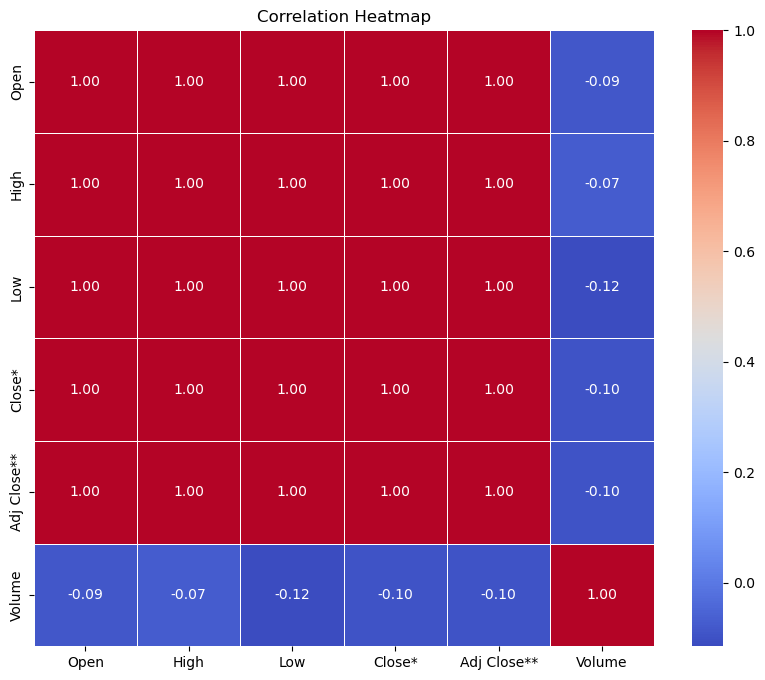

In [13]:
#checking for high correlation in the columns

import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
correlation_matrix = features.corr()

# Set up the plot size
plt.figure(figsize=(10, 8))

# Plot the heatmap
sns.heatmap(
    correlation_matrix, 
    annot=True,  # Display the correlation coefficients
    fmt=".2f",   # Format the annotations to 2 decimal places
    cmap="coolwarm",  # Use a visually appealing color map
    linewidths=0.5  # Add lines between cells for clarity
)

# Add title
plt.title('Correlation Heatmap')

# Show the plot
plt.show()